## Análisis Precipitación Total Parque Nacional Cerro Saroche

**PROYECTO:** SISTEMA PARA EL SEGUIMIENTO DE ECOSISTEMAS VENEZOLANOS \
**AUTOR:** Javier Martinez

Directorio de trabajo

In [1]:
import os

print('> Directorio actual: ', os.getcwd())  
os.chdir('../')
print('> Directorio actual: ', os.getcwd()) 

> Directorio actual:  /media/javier/Compartida/doctorado/ssev-analytics/cerro_saroche
> Directorio actual:  /media/javier/Compartida/doctorado/ssev-analytics


In [2]:
from utils.MONGO import CONEXION
from utils.UTILS import *
from datetime import datetime
import pandas as pd

from tensorflow import keras

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Creando Coenxión con Mongo DB

In [4]:
# Creando la conexión con MongoDB
db = CONEXION.conexion()
db.list_collection_names()

['meteorological', 'estimateSSTNino34', 'SSTNino34']

# Descargando la Información Precipitación

In [5]:
# Parque
park = 'cerro_saroche'

# Realizando consulta
meteorological = db.meteorological.find({"park":park})

# Generando pandas dataframe
data_pandas = pd.DataFrame([file for file in meteorological])
data_pandas['periodo'] = data_pandas.time.apply(lambda x: datetime.fromordinal(x))
data_pandas['mes_year'] =  data_pandas['periodo'].dt.strftime('%B-%Y')
data_pandas.index = pd.to_datetime(data_pandas.periodo)
data_pandas.head()

,_id,id_point,park,time,elevacion_maxima,elevacion_media,elevacion_mediana,latitud,longitud,ndvi_maxima,ndvi_media,ndvi_mediana,precipitacion_mm,time_actualizacion,periodo,mes_year
periodo,,,,,,,,,,,,,,,,
1970-01-01,633988a2eed0e0231b327c97,1,cerro_saroche,719163,921.0,508.541046,491.0,10.31,-69.83,NaN,NaN,NaN,0.913065,738430,1970-01-01,January-1970
1970-01-01,633988a2eed0e0231b327ca7,2,cerro_saroche,719163,1000.0,625.942932,614.0,10.31,-69.73,NaN,NaN,NaN,0.958915,738430,1970-01-01,January-1970
1970-01-01,633988a2eed0e0231b327cc0,3,cerro_saroche,719163,1025.0,731.954834,731.0,10.31,-69.63,NaN,NaN,NaN,1.026073,738430,1970-01-01,January-1970
1970-01-01,633988a2eed0e0231b327ccc,4,cerro_saroche,719163,1103.0,761.129150,737.0,10.31,-69.53,NaN,NaN,NaN,1.095035,738430,1970-01-01,January-1970
1970-01-01,633988a3eed0e0231b327cdc,5,cerro_saroche,719163,1202.0,726.967285,709.0,10.31,-69.43,NaN,NaN,NaN,1.203287,738430,1970-01-01,January-1970


In [6]:
# Registros
print(data_pandas.shape)

(9435, 16)


In [7]:
# Data disponible
print(data_pandas.index.min())
print(data_pandas.index.max())

1970-01-01 00:00:00
2022-05-01 00:00:00


In [8]:
DIR = './cerro_saroche/'

In [9]:
# Cantidad de registros
park_points = data_pandas[[ 'id_point','latitud', 'longitud','precipitacion_mm']]\
                .groupby(['id_point','latitud', 'longitud'],as_index=False)\
                .count()

# Guardando resumen de experimentos
park_points.to_csv(DIR + 'summary/poinst.csv')
park_points

,id_point,latitud,longitud,precipitacion_mm
0,1,10.31,-69.83,629
1,2,10.31,-69.73,629
2,3,10.31,-69.63,629
3,4,10.31,-69.53,629
4,5,10.31,-69.43,629
5,6,10.21,-69.83,629
6,7,10.21,-69.73,629
7,8,10.21,-69.63,629
8,9,10.21,-69.53,629
9,10,10.21,-69.43,629


# Estudio Precipitación

In [10]:
pd_precipitacion = data_pandas[['id_point', 'latitud', 'longitud',
                                'precipitacion_mm']]
pd_precipitacion.head()

,id_point,latitud,longitud,precipitacion_mm
periodo,,,,
1970-01-01,1,10.31,-69.83,0.913065
1970-01-01,2,10.31,-69.73,0.958915
1970-01-01,3,10.31,-69.63,1.026073
1970-01-01,4,10.31,-69.53,1.095035
1970-01-01,5,10.31,-69.43,1.203287


In [11]:
fig = precipitacion_graf(pd_precipitacion = pd_precipitacion,
                        rows=5, 
                        cols=3,
                        park = 'Cerro Saroche')

fig.write_image(DIR + '/figures/precipitacion_cerro_saroche.png')

fig.show()

# Cargando data SST

In [12]:
# Realizando consulta
data_sst = db.estimateSSTNino34.find()

# Generando pandas dataframe
pd_sst = pd.DataFrame([file for file in data_sst])[['oni','time']]
pd_sst['periodo'] = pd_sst.time.apply(lambda x: datetime.fromordinal(x))
pd_sst.index = pd.to_datetime(pd_sst.periodo)
pd_sst

pd_sst.head()

,oni,time,periodo
periodo,,,
1950-01-01,-1.470000,711858,1950-01-01
1950-02-01,-1.336667,711889,1950-02-01
1950-03-01,-1.163333,711917,1950-03-01
1950-04-01,-1.180000,711948,1950-04-01
1950-05-01,-1.070000,711978,1950-05-01


In [13]:
oni_max = pd_sst.oni.max()
oni_min = pd_sst.oni.min()

pd_sst['oni'] = pd_sst['oni'].apply(lambda x: (x-oni_min)/(oni_max-oni_min))

# Integrando base de datos

In [14]:
# Entrenamiento
pd_model = pd.merge(pd_precipitacion.reset_index(drop=False),pd_sst[['oni']].reset_index(drop=False),
                    on=['periodo'],
                    how='left'
                    )

# Pronostico
pd_sst_pron = pd_sst[['periodo','oni']][pd_sst.periodo > pd_model.periodo.max()].copy()

In [15]:
pd_model[[ 'id_point','latitud', 'longitud','oni']]\
                .groupby(['id_point','latitud', 'longitud'],as_index=False)\
                .count()

,id_point,latitud,longitud,oni
0,1,10.31,-69.83,629
1,2,10.31,-69.73,629
2,3,10.31,-69.63,629
3,4,10.31,-69.53,629
4,5,10.31,-69.43,629
5,6,10.21,-69.83,629
6,7,10.21,-69.73,629
7,8,10.21,-69.63,629
8,9,10.21,-69.53,629
9,10,10.21,-69.43,629


# Ajustando modelo NARX

In [16]:
# Transformacion
transformacion = LogMinimax.create( pd_precipitacion.precipitacion_mm.to_numpy() )

pd_model['precip_t'] = transformacion.transformacion()

Modelo según ID point

In [17]:
id_point = 1
y_output = 'precip_t'
exogena = 'oni'

prediction_order = 12 # rango de prediccion
auto_order = 10*12 # componente autoregresiva
exog_order = 7 # componente exogena qm
exog_delay = 4# componente exogena dm

In [18]:
pd_model_id = pd_model[pd_model.id_point==id_point]
pd_model_id.index = pd.to_datetime(pd_model_id.periodo)
pd_model_id = pd_model_id[[y_output,exogena]]

pd_model_id.head()

,precip_t,oni
periodo,,
1970-01-01,0.623173,0.543835
1970-02-01,0.230999,0.506771
1970-03-01,0.494855,0.497505
1970-04-01,0.620052,0.476123
1970-05-01,0.811064,0.444048


Definiendo estructura de datos

In [19]:
def split_data(pd_model_id,exog_order,auto_order,exog_delay,prediction_order):
    """
    Funcion para dale estructura a los datos
    """

    min_index = max([exog_order,auto_order])

    x_data = []
    y_data = []

    for t in pd_model_id[min_index:].index:

        #t = pd_model_id[min_index:].index.min()

        to_split = pd_model_id[[y_output,exogena]]
        to_split = to_split[(t-pd.DateOffset(months=auto_order)):t].copy()

        # Exogena
        x_exo = to_split[exogena][(t-pd.DateOffset(months=exog_delay+exog_order)):(t-pd.DateOffset(months=exog_delay+1))]\
                            .to_numpy()\
                            .astype(float)\
                            .reshape(-1)

        # Auto
        x_auto = to_split[y_output][:-1]\
                    .to_numpy()\
                    .astype(float)\
                    .reshape(-1)

        x_data.append(np.concatenate([x_exo, x_auto],axis=None))
        y_data.append(to_split[y_output][-1])

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    return x_data, y_data

In [20]:
x_data, y_data = split_data(pd_model_id,exog_order,auto_order,exog_delay,prediction_order)


print(x_data.shape)
print(y_data.shape)

(509, 127)
(509,)


Entrenamiento y validación

In [21]:
x_train = x_data[:-prediction_order]
x_vasl = x_data[-prediction_order:]

y_train = y_data[:-prediction_order]
y_vasl = y_data[-prediction_order:]

print(x_train.shape)
print(x_vasl.shape)

print(y_train.shape)
print(y_vasl.shape)

(497, 127)
(12, 127)
(497,)
(12,)


Modelo NARX

In [22]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [23]:
# Metrícas
mae = keras.metrics.MeanAbsoluteError()
rmse = keras.metrics.RootMeanSquaredError()

In [24]:
confi = {'Input':{'batch_size':None,
                'name':'input',
                'dtype':None,
                'sparse':None,
                'tensor':None,
                'ragged':None,
                'type_spec':None},
        'Dense':{'use_bias':True,
                'kernel_regularizer':None,
                'bias_regularizer':None,
                'activity_regularizer':None,
                'kernel_constraint':None,
                'bias_constraint':None
                }
        }

In [25]:

n_neurons = [int(2*x_train.shape[-1]/3),int(x_train.shape[-1])/3,]
activation = ['tanh','tanh']
kernel_initializer = 'lecun_normal'
bias_initializer = 'zeros'
patience = 15
epochs=500


# Modelo
model = keras.models.Sequential()

# Entradas
model.add(keras.layers.Input(shape=(x_train.shape[-1],),
                                    batch_size = confi.get('Input').get('batch_size'),
                                    name = confi.get('Input').get('name'),
                                    dtype = confi.get('Input').get('dtype'),
                                    sparse = confi.get('Input').get('sparse'),
                                    tensor = confi.get('Input').get('tensor'),
                                    ragged = confi.get('Input').get('ragged'),
                                    type_spec = confi.get('Input').get('type_spec')
                                    ))

# Hidden Leyers
model.add(keras.layers.Dense(   units=n_neurons[0],
                                activation=activation[0],
                                use_bias = confi.get('Dense').get('use_bias'),
                                kernel_initializer=kernel_initializer,
                                bias_initializer=bias_initializer,
                                kernel_regularizer = confi.get('Dense').get('kernel_regularizer'),
                                bias_regularizer = confi.get('Dense').get('bias_regularizer'),
                                activity_regularizer = confi.get('Dense').get('activity_regularizer'),
                                kernel_constraint = confi.get('Dense').get('kernel_constraint'),
                                bias_constraint = confi.get('Dense').get('bias_constraint')
                                ))

model.add(keras.layers.Dense(   units=n_neurons[1],
                                activation=activation[1],
                                use_bias = confi.get('Dense').get('use_bias'),
                                kernel_initializer=kernel_initializer,
                                bias_initializer=bias_initializer,
                                kernel_regularizer = confi.get('Dense').get('kernel_regularizer'),
                                bias_regularizer = confi.get('Dense').get('bias_regularizer'),
                                activity_regularizer = confi.get('Dense').get('activity_regularizer'),
                                kernel_constraint = confi.get('Dense').get('kernel_constraint'),
                                bias_constraint = confi.get('Dense').get('bias_constraint')
                                ))

# Out
model.add(keras.layers.Dense(   units=1,
                                activation='linear',
                                # use_bias = confi.get('Dense').get('use_bias'),
                                kernel_initializer=kernel_initializer,
                                bias_initializer=bias_initializer,
                                # kernel_regularizer = confi.get('Dense').get('kernel_regularizer'),
                                # bias_regularizer = confi.get('Dense').get('bias_regularizer'),
                                # activity_regularizer = confi.get('Dense').get('activity_regularizer'),
                                # kernel_constraint = confi.get('Dense').get('kernel_constraint'),
                                # bias_constraint = confi.get('Dense').get('bias_constraint')
                                ))
                                

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[mae,rmse]) 

In [26]:
callback = keras.callbacks.EarlyStopping(
                                            monitor="loss",
                                            min_delta=0,
                                            patience=patience,
                                            verbose=0,
                                            mode="min",
                                            baseline=None,
                                            restore_best_weights=False,
                                        )

Directorio experimento

In [27]:
experimento = f'experiments/narx_prec_{id_point}_{len(n_neurons)}_{activation[0]}_{prediction_order}_{auto_order}_{exog_order}_{exog_delay}'

try:
    os.mkdir(f'{DIR}/{experimento}')
except:
    pass

Entrenamiento

In [28]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=epochs,
                    batch_size=1,
                    verbose=0,
                    workers=2,
                    callbacks=[callback])

In [29]:
print(f'Total epocas:{len(history.epoch)}')

Total epocas:158


Guardando experimento

In [30]:
model.save(f'{DIR}/{experimento}/narx_precipitacion_model.h5')
# Save Pesos
model.save_weights(f'{DIR}/{experimento}/narx_precipitacionweights.h5')

# Save History
import pickle
with open(f'{DIR}/{experimento}/narx_precipitacion_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Evaluación entrenamiento

In [31]:
min_index = max([exog_order,auto_order])

In [32]:
# make predictions
trainPredict = model.predict(x_train, verbose=0).reshape(-1)
testPredict = model.predict(x_vasl, verbose=0).reshape(-1)

In [33]:
# Data de test
trainind_pd = pd.DataFrame(trainPredict,
                            index = pd_model_id[min_index:(min_index+trainPredict.shape[0])].index,
                            columns=['prediction']
                            )
                            
trainind_pd[y_output] = y_train.reshape(-1)
trainind_pd['type'] = 'training'

trainind_pd['precipitacion_mm'] = trainind_pd[y_output].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )
trainind_pd['prediction_precipitacion_mm'] = trainind_pd['prediction'].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )


trainind_pd = pd.merge(trainind_pd,pd_model_id[['oni']].reset_index(drop=False),
                        on=['periodo'],
                        how='left')

trainind_pd.index = pd.to_datetime(trainind_pd.periodo)

# Validacion entrenamiento
trainig_metrics = metrics(observado=trainind_pd.precipitacion_mm,
                          prediccion=trainind_pd.prediction_precipitacion_mm)

Evaluación validación

In [34]:
# Data de Validacion
validation_pd = pd.DataFrame(testPredict,
                            index = pd_model_id[(min_index+trainPredict.shape[0]):(min_index+trainPredict.shape[0]+prediction_order)].index,
                            columns=['prediction']
                            )

validation_pd[y_output] = y_vasl.reshape(-1)
validation_pd['type'] = 'validation'

validation_pd['precipitacion_mm'] = validation_pd[y_output].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )
validation_pd['prediction_precipitacion_mm'] = validation_pd['prediction'].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )

validation_pd = pd.merge(validation_pd,pd_model_id[['oni']].reset_index(drop=False),
                        on=['periodo'],
                        how='left')

# Validacion entrenamiento
validation_metrics = metrics(observado=validation_pd.precipitacion_mm,
                          prediccion=validation_pd.prediction_precipitacion_mm)

Test

In [35]:
def predict_one_stap_narx(model,data_predict,data_exogena,exog_order,auto_order,exog_delay,prediction_order):
  """
  Funcion para predecir a un paso
  """
  data_predict = data_predict.copy()
  data_predict['type'] = 'data_in'

  for t in data_exogena.index:
    
      x_data_test, y_data_test = split_data(data_predict,
                                          exog_order,
                                          auto_order,
                                          exog_delay,
                                          prediction_order)


      predit = model.predict(x_data_test[-1].reshape(1, x_data_test.shape[1]), verbose=0).reshape(-1)
      exo = data_exogena[data_exogena.index==t][exogena][0]

      data_test = pd.DataFrame({'periodo':t, y_output:predit, exogena:exo,'type':'data_out'},index=[0])
      data_test.index = pd.to_datetime(data_test.periodo)

      data_predict = pd.concat([data_predict,
                                data_test[list(data_predict)]
                              ])

  return data_predict

In [36]:
data_predict = pd_model_id[pd_model_id.index<=trainind_pd.periodo.max()][[y_output,exogena]]
data_exogena = pd_model_id[pd_model_id.index>trainind_pd.periodo.max()][[exogena]]

pd_test = predict_one_stap_narx(model,data_predict,data_exogena,exog_order,auto_order,exog_delay,prediction_order)

pd_test = pd_test[pd_test.type=='data_out']
pd_test['type'] = 'test'

pd_test['prediction'] = pd_test[y_output]
pd_test['precipitacion_mm'] = pd_model_id[pd_model_id.index>trainind_pd.periodo.max()][y_output].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )
pd_test['prediction_precipitacion_mm'] = pd_test[y_output].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )
pd_test['precip_t'] = pd_model_id[pd_model_id.index>trainind_pd.periodo.max()][y_output]

# Validacion entrenamiento
test_metrics = metrics(observado=pd_test.precipitacion_mm,
                        prediccion=pd_test.prediction_precipitacion_mm)

In [37]:
pd_test.head()

,precip_t,oni,type,prediction,precipitacion_mm,prediction_precipitacion_mm
periodo,,,,,,
2021-06-01,0.760497,0.354241,test,0.711214,2.129873,1.571588
2021-07-01,0.585681,0.348539,test,0.566668,0.724552,0.644377
2021-08-01,0.668445,0.328582,test,0.564394,1.207184,0.635401
2021-09-01,0.599279,0.289380,test,0.582877,0.787944,0.712130
2021-10-01,0.719855,0.260870,test,0.765637,1.657627,2.198482


Resultados del modelo

In [38]:
dict_metrics = {'epocas':[len(history.epoch)],
                'prediction_order':[prediction_order],
                'auto_order':[auto_order],
                'training_mse':[history.history["loss"][-1]],
                'training_rmse':[history.history["root_mean_squared_error"][-1]],
                'training_mae':[history.history["mean_absolute_error"][-1]],
                'trainig_mape':[trainig_metrics['mape']],
                'trainig_r':[trainig_metrics['r2']],
                'validation_mse':[validation_metrics["mse"]],
                'validation_rmse':[validation_metrics["rmse"]],
                'validation_mae':[validation_metrics["mae"]],
                'validation_mape':[validation_metrics['mape']],
                'validation_r':[validation_metrics['r2']],
                'test_mse':[test_metrics["mse"]],
                'test_rmse':[test_metrics["rmse"]],
                'test_mae':[test_metrics["mae"]],
                'test_mape':[test_metrics['mape']],
                'test_r':[test_metrics['r2']]
                }

experimento_pd = pd.DataFrame.from_dict(dict_metrics)
experimento_pd.to_csv(f'{DIR}/{experimento}/summary.csv',index=False)

In [39]:
experimento_pd

,epocas,prediction_order,auto_order,training_mse,training_rmse,training_mae,trainig_mape,trainig_r,validation_mse,validation_rmse,validation_mae,validation_mape,validation_r,test_mse,test_rmse,test_mae,test_mape,test_r
0,158,12,120,0.007341,0.085681,0.068266,36.01257,0.741162,1.037754,1.076934,0.766802,108.794705,-0.152885,1.280163,1.638816,0.872427,174.61997,-0.754394


Pronóstico

In [40]:
data_predict = pd_model_id[[y_output,exogena]]
data_exogena = pd_sst_pron[pd_sst_pron.index>data_predict.index.max()][[exogena]]

pd_prediction = predict_one_stap_narx(model,data_predict,data_exogena,exog_order,auto_order,exog_delay,prediction_order)

pd_prediction = pd_prediction[pd_prediction.type=='data_out']
pd_prediction['type'] = 'prediction'



pd_prediction['precipitacion_mm'] = np.nan
pd_prediction['prediction_precipitacion_mm'] = pd_prediction[y_output].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )

pd_prediction['prediction'] = pd_prediction[y_output]
pd_prediction['precip_t'] = np.nan

In [41]:
trainind_pd.head()

,periodo,prediction,precip_t,type,precipitacion_mm,prediction_precipitacion_mm,oni
periodo,,,,,,,
1980-01-01,1980-01-01,0.424954,0.400931,training,0.231833,0.268860,0.560941
1980-02-01,1980-02-01,0.349721,0.290810,training,0.117542,0.169043,0.532431
1980-03-01,1980-03-01,0.365981,0.245142,training,0.088687,0.186877,0.506771
1980-04-01,1980-04-01,0.659393,0.594221,training,0.763742,1.141626,0.515324
1980-05-01,1980-05-01,0.675342,0.687271,training,1.355818,1.259645,0.537420


In [42]:
pd_test.head()

,precip_t,oni,type,prediction,precipitacion_mm,prediction_precipitacion_mm
periodo,,,,,,
2021-06-01,0.760497,0.354241,test,0.711214,2.129873,1.571588
2021-07-01,0.585681,0.348539,test,0.566668,0.724552,0.644377
2021-08-01,0.668445,0.328582,test,0.564394,1.207184,0.635401
2021-09-01,0.599279,0.289380,test,0.582877,0.787944,0.712130
2021-10-01,0.719855,0.260870,test,0.765637,1.657627,2.198482


In [43]:
pd_prediction.head()

,precip_t,oni,type,precipitacion_mm,prediction_precipitacion_mm,prediction
periodo,,,,,,
2022-06-01,NaN,0.237455,prediction,NaN,2.065072,0.755487
2022-07-01,NaN,0.264983,prediction,NaN,0.695036,0.578938
2022-08-01,NaN,0.270267,prediction,NaN,0.640672,0.565733
2022-09-01,NaN,0.287442,prediction,NaN,1.214302,0.669398
2022-10-01,NaN,0.302874,prediction,NaN,1.247888,0.673822


In [44]:
# Uniendo informacion
pd_summary = pd.concat([trainind_pd, 
                        pd_test.reset_index(drop=False), 
                        pd_prediction.reset_index(drop=False)])
pd_summary.index = pd.to_datetime(pd_summary.periodo)

pd_summary.to_pickle(f'{DIR}/{experimento}/predicciones.pkl')

In [45]:
pd_test[pd_test.index>'2020-01-01']

,precip_t,oni,type,prediction,precipitacion_mm,prediction_precipitacion_mm
periodo,,,,,,
2021-06-01,0.760497,0.354241,test,0.711214,2.129873,1.571588
2021-07-01,0.585681,0.348539,test,0.566668,0.724552,0.644377
2021-08-01,0.668445,0.328582,test,0.564394,1.207184,0.635401
2021-09-01,0.599279,0.289380,test,0.582877,0.787944,0.712130
2021-10-01,0.719855,0.260870,test,0.765637,1.657627,2.198482
2021-11-01,0.554949,0.225232,test,0.745184,0.599444,1.937915
2021-12-01,0.440205,0.224519,test,0.784881,0.295380,2.475552
2022-01-01,0.139224,0.228083,test,0.467214,0.046146,0.348923
2022-02-01,0.428969,0.234498,test,0.437344,0.275602,0.290212


In [46]:
pd_summary[pd_summary.index>'2020-01-01']

,periodo,prediction,precip_t,type,precipitacion_mm,prediction_precipitacion_mm,oni
periodo,,,,,,,
2020-02-01,2020-02-01,0.288914,0.179201,training,0.059050,0.116175,0.538845
2020-03-01,2020-03-01,0.371141,0.260812,training,0.097686,0.192919,0.521026
2020-04-01,2020-04-01,0.584967,0.531261,training,0.517959,0.721371,0.474697
2020-05-01,2020-05-01,0.567541,0.525789,training,0.500768,0.647855,0.416251
2020-06-01,2020-06-01,0.565674,0.739741,training,1.873939,0.640438,0.369209
2020-07-01,2020-07-01,0.562345,0.647075,training,1.058104,0.627420,0.347113
2020-08-01,2020-08-01,0.649321,0.693612,training,1.409903,1.072865,0.312188
2020-09-01,2020-09-01,0.752852,0.763446,training,2.168971,2.031774,0.243763
2020-10-01,2020-10-01,0.692238,0.707119,training,1.532387,1.397999,0.184604


<AxesSubplot:xlabel='periodo'>

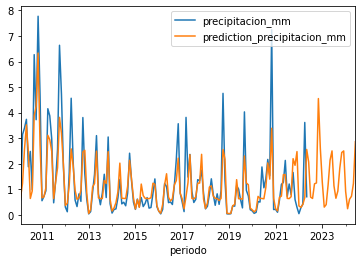

In [47]:
pd_summary[pd_summary.index>'2010-01-01'][['precipitacion_mm','prediction_precipitacion_mm']].plot()

<AxesSubplot:xlabel='periodo'>

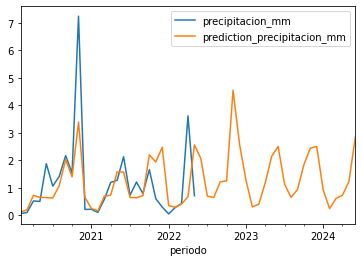

In [48]:
pd_summary[pd_summary.index>'2020-01-01'][['precipitacion_mm','prediction_precipitacion_mm']].plot()